### Different expected value plots

In [1]:
import expected_value
import glob
import re
import approximate_regions
import triangulate_helper
import grid_plots
import pandas as pd
import numpy as np

## Functions for grid data plotting

- We use multithreading for computing on the grid

### Compute pre-data and grid-plots
- note that the grid plotting takes a LONG time
- example data is uploaded to use instead

In [2]:
approximate_regions.output_all_contours(5, 'output/region_contours/points_per_mm=5')
triangulate_helper.output_triangles('output/region_contours/points_per_mm=5', 'output/triangles/points_per_mm=5')

sds = [1, 5, 10, 25, 50, 75, 100, 125, 150, 175, 200]
for sd in sds:
    print(f'--------------sd={sd}--------------')
    grid_plots.compute_on_grid(f'output/grid_data/StdDev={sd},Res=116/grid_data.csv','output/triangles/points_per_mm=5' , sd, 116)


num points: 13456
should take ~ 3904 seconds!
[Worker 6] 0% complete
[Worker 1] 0% complete
[Worker 3] 0% complete
[Worker 2] 0% complete
[Worker 0] 0% complete
[Worker 4] 0% complete
[Worker 5] 0% complete
[Worker 7] 0% complete
[Worker 6] 10% complete
[Worker 2] 10% complete
[Worker 7] 10% complete
[Worker 3] 10% complete
[Worker 0] 10% complete
[Worker 4] 10% complete
[Worker 1] 10% complete
[Worker 5] 10% complete


KeyboardInterrupt: 

### Compute min and max scores so we can graph heatmaps equivalently

In [2]:
all_scores = []

for f in glob.glob('output/grid_data/StdDev=*,Res=116/grid_data.csv'):
    df = pd.read_csv(f, header=None, names=["x", "y", "score"])
    all_scores.extend(df["score"].values)

global_min = np.min(all_scores)
global_max = np.max(all_scores)

print("Global score range:", global_min, global_max)


Global score range: 0.0 59.98904019291794


output/grid_data/StdDev=1,Res=116/grid_data.csv


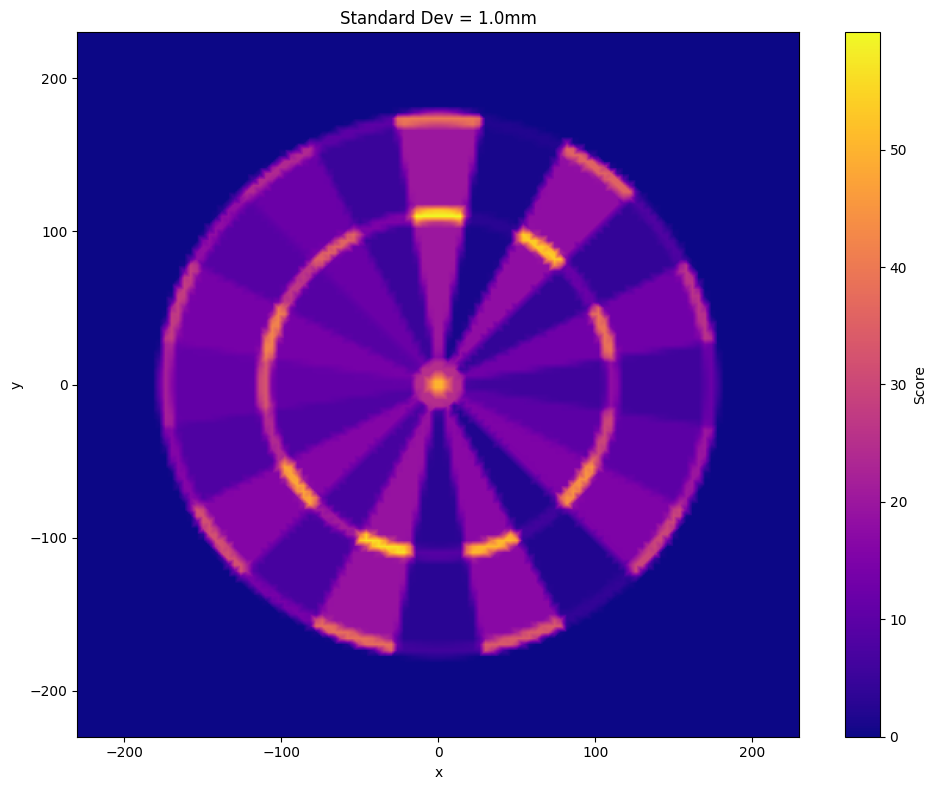

output/grid_data/StdDev=5,Res=116/grid_data.csv


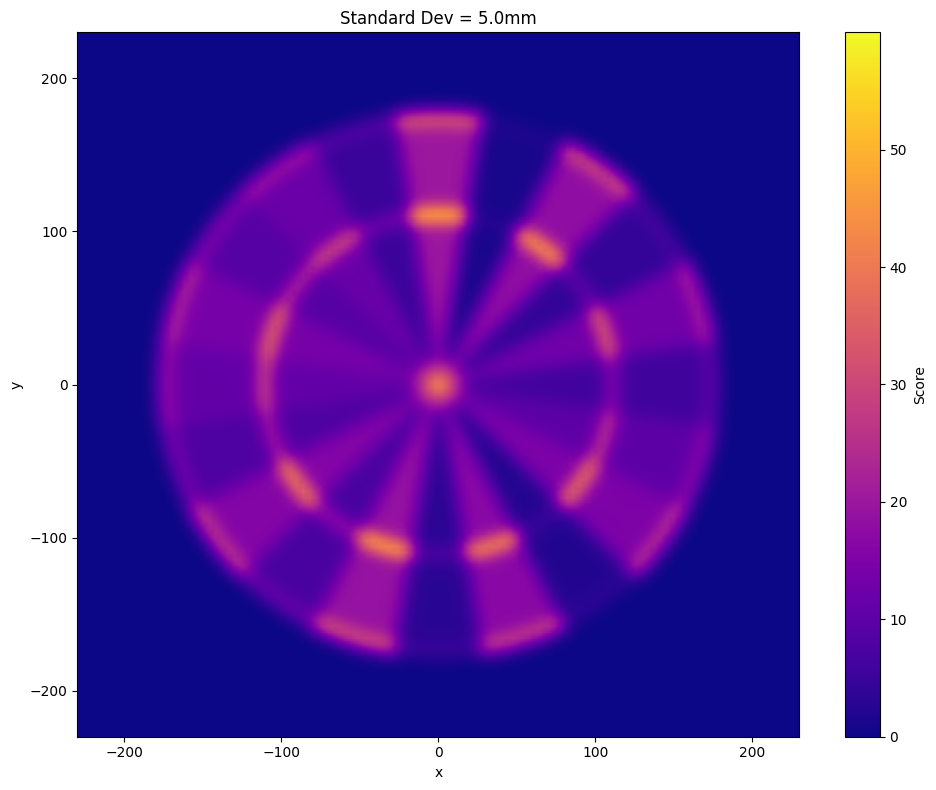

output/grid_data/StdDev=10,Res=116/grid_data.csv


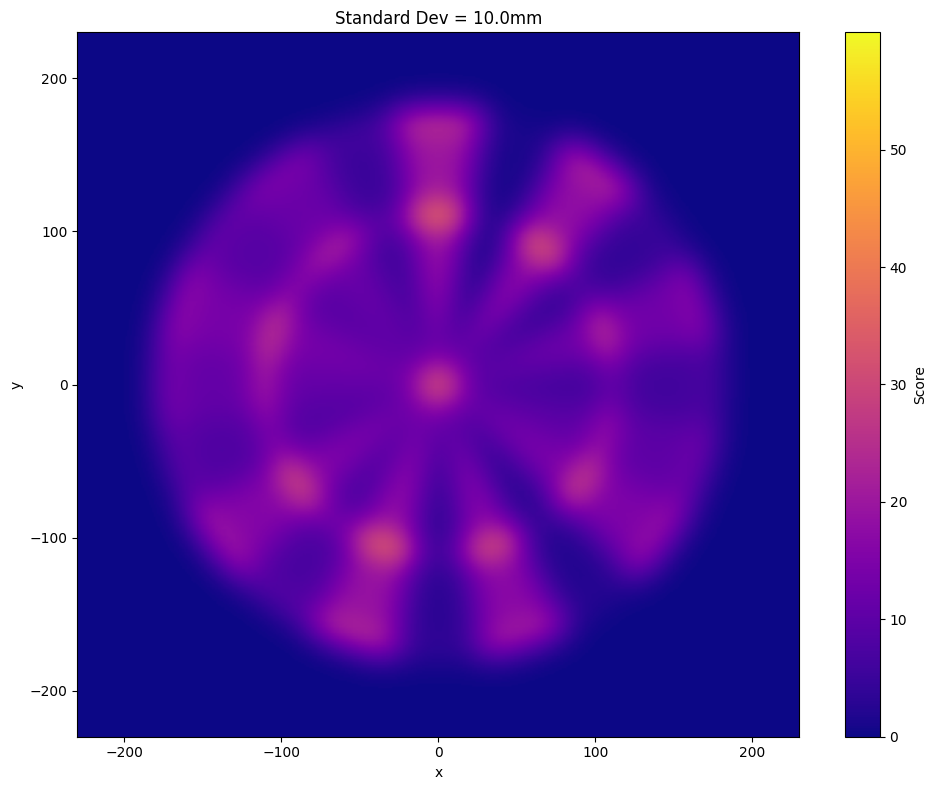

output/grid_data/StdDev=25,Res=116/grid_data.csv


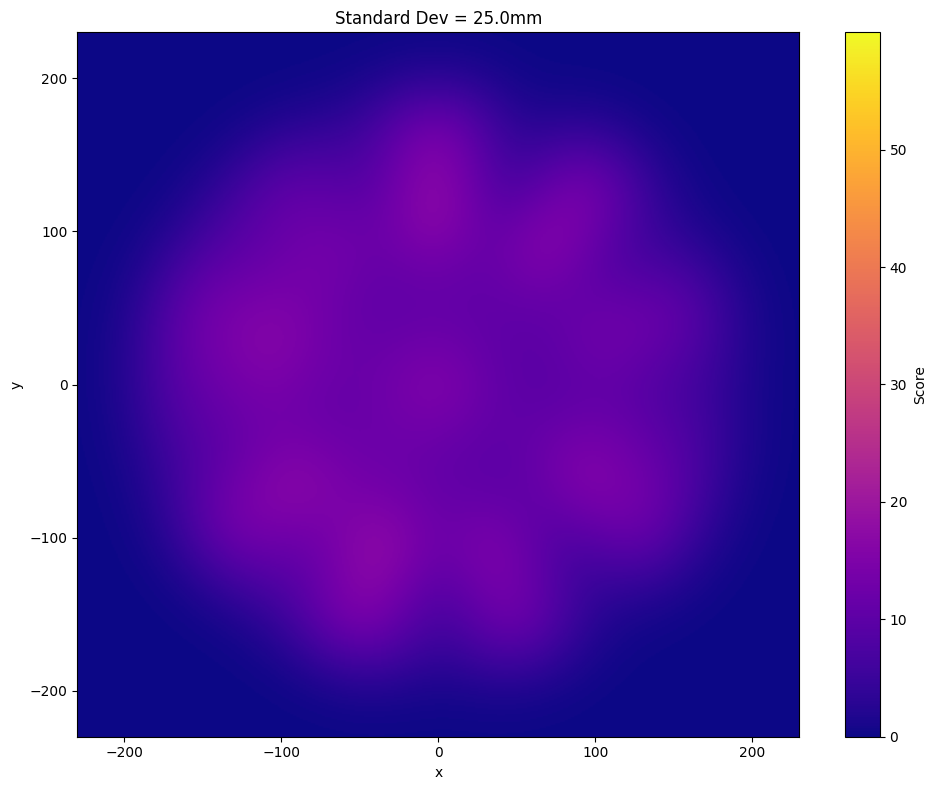

output/grid_data/StdDev=50,Res=116/grid_data.csv


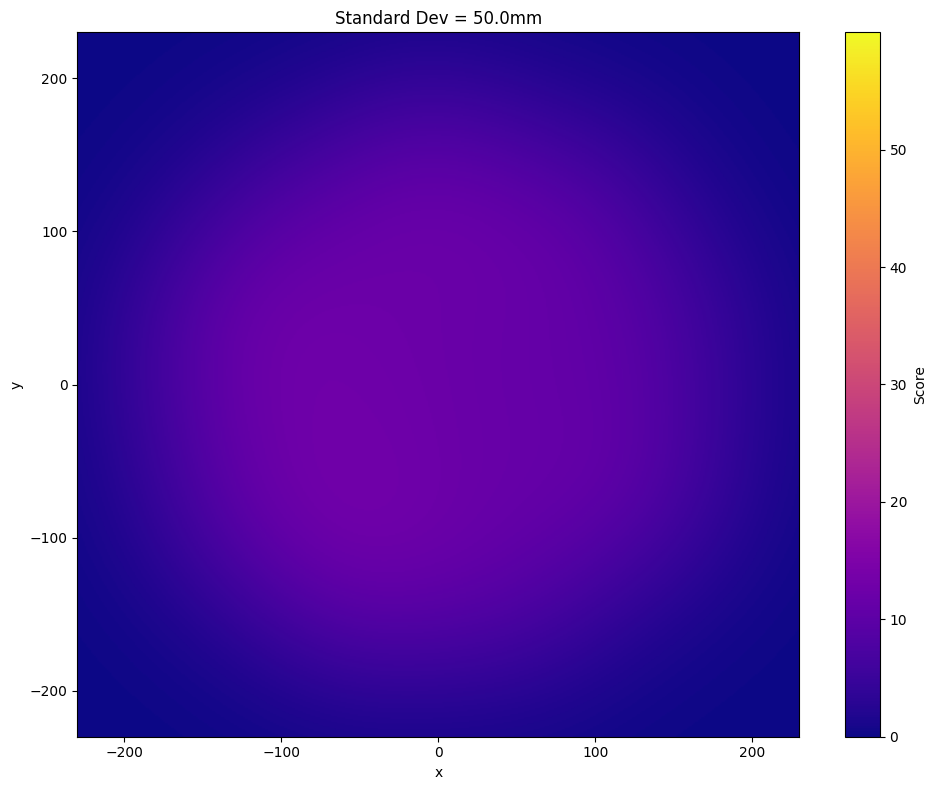

output/grid_data/StdDev=75,Res=116/grid_data.csv


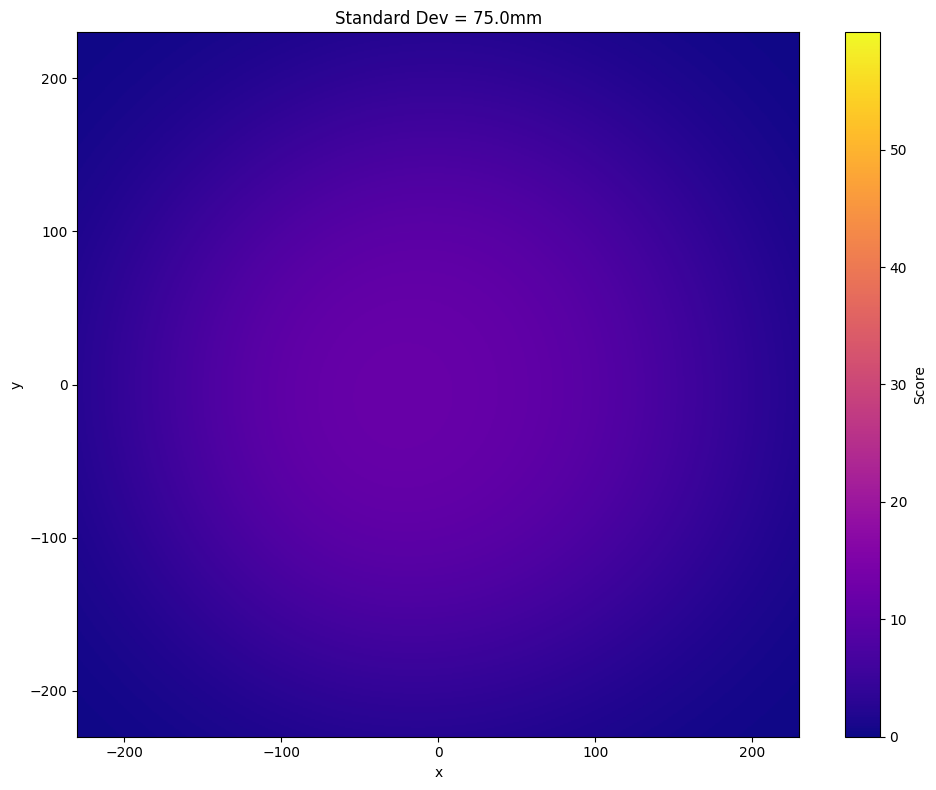

output/grid_data/StdDev=100,Res=116/grid_data.csv


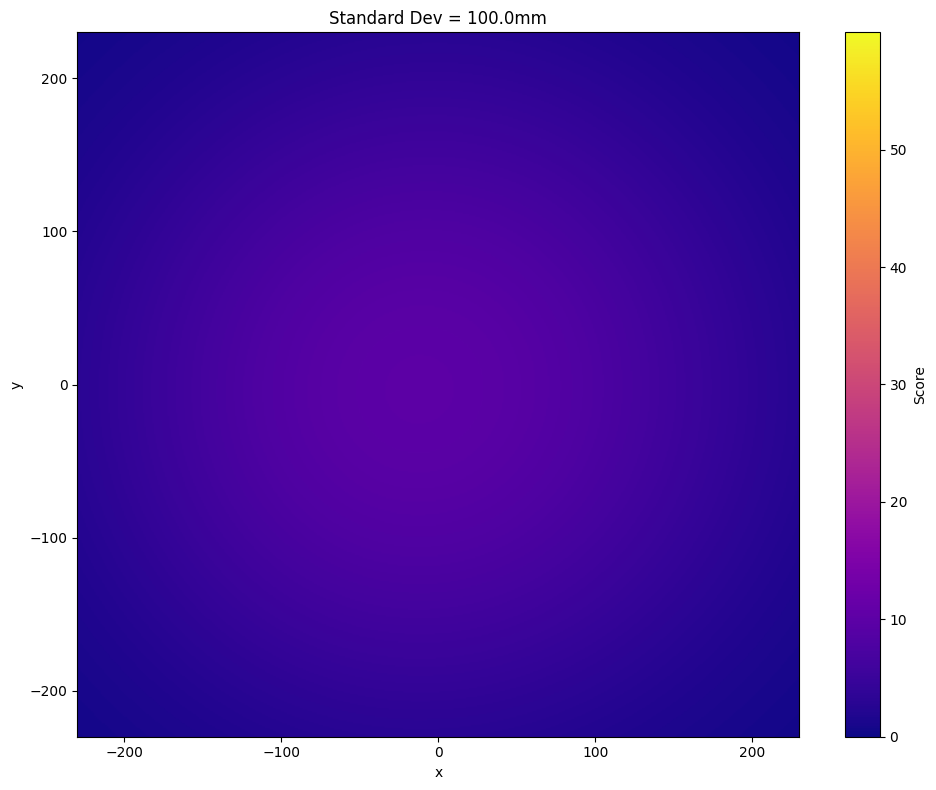

output/grid_data/StdDev=125,Res=116/grid_data.csv


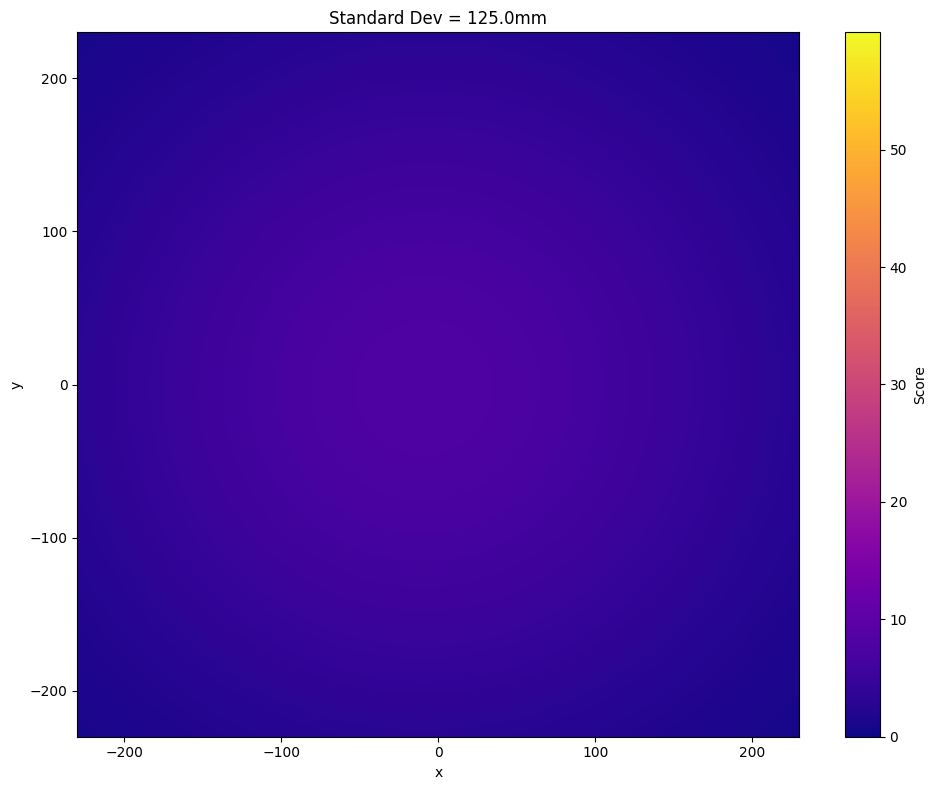

output/grid_data/StdDev=150,Res=116/grid_data.csv


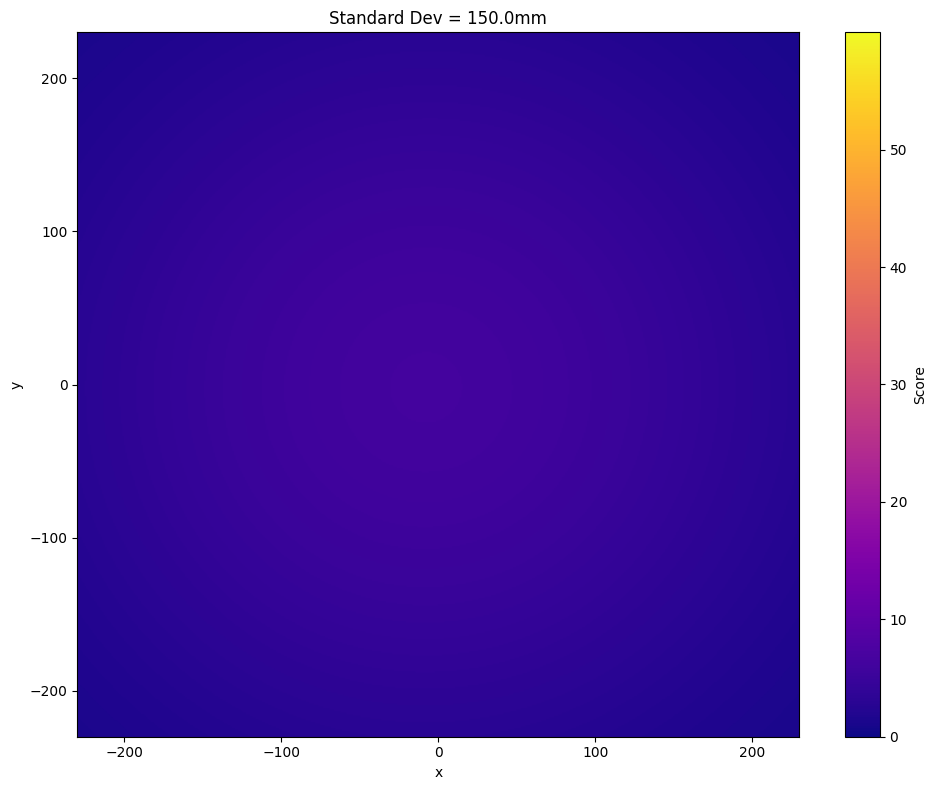

output/grid_data/StdDev=175,Res=116/grid_data.csv


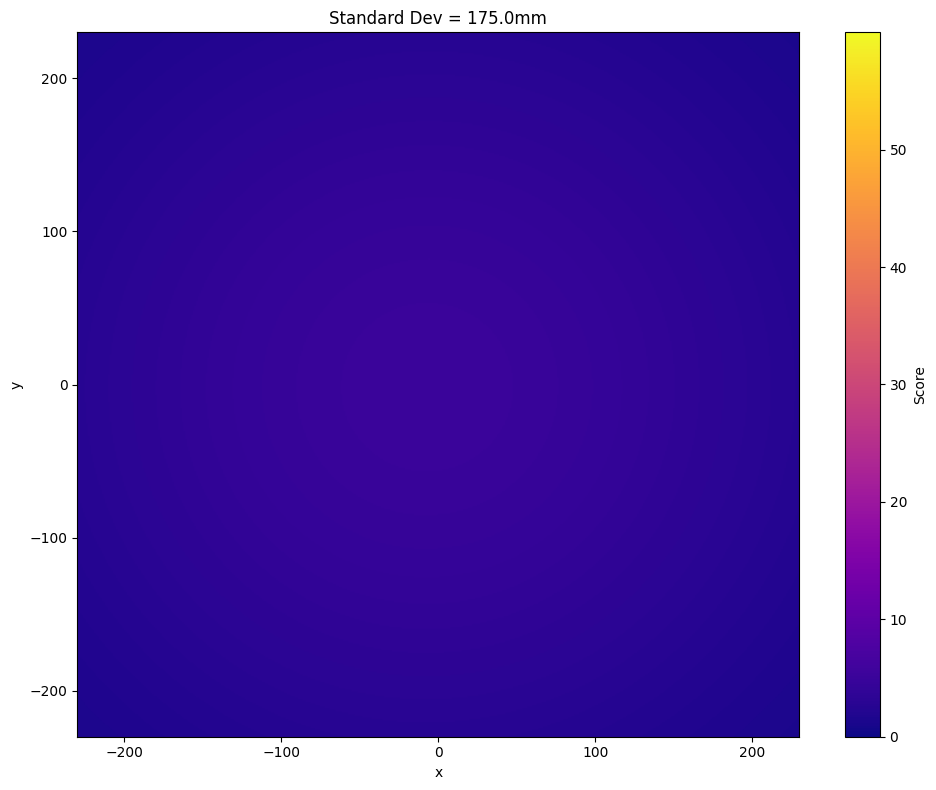

output/grid_data/StdDev=200,Res=116/grid_data.csv


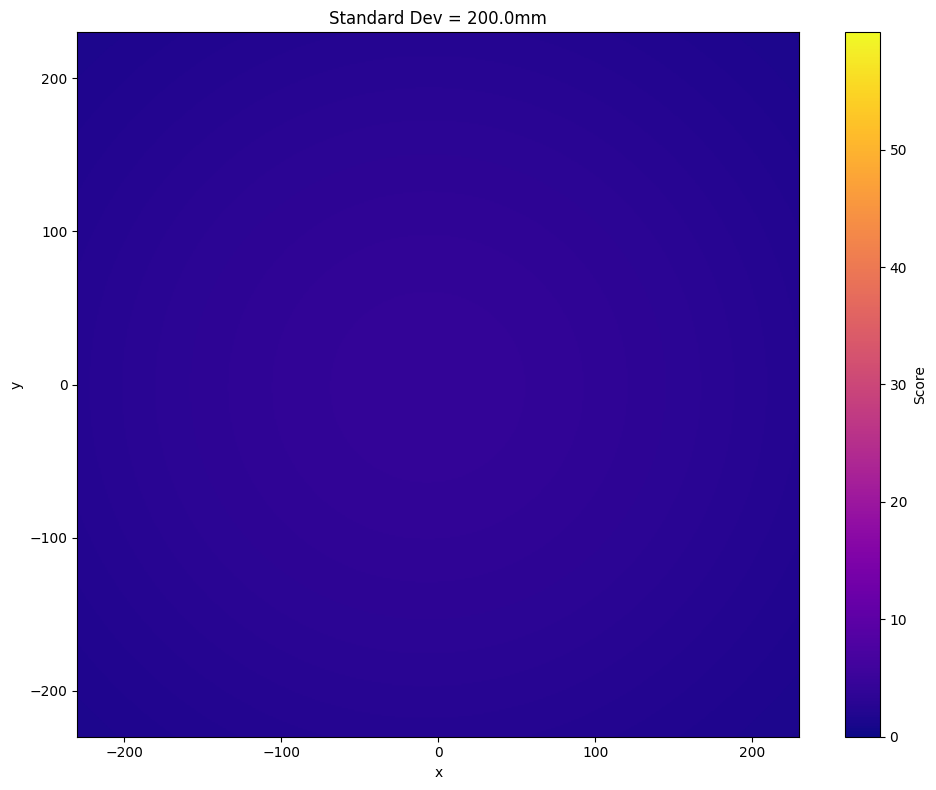

In [3]:
grids = {}

for f in glob.glob('output/grid_data/StdDev=*,Res=116/grid_data.csv'):
    if m := re.search('^output/grid_data/StdDev=(.*),Res=116/grid_data.csv', f):
        sd = float(m.group(1))
        grids[f] = sd

for f, sd in sorted(grids.items(), key=lambda item: item[1]):
    print(f)
    grid_plots.plot_heatmap(f, f'Standard Dev = {sd}mm', vmin=global_min, vmax=global_max)